(Rcode-transform)=
# Transformaciones con R

**Cálculo de transformaciones de la serie del PIB de Costa Rica**

Importar las librerías necesarias

In [1]:
library(readr)
library(fpp3)
library(slider)
#library(ggplot2)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── fpp3 0.4.0 ──



✔ tibble      3.1.0      ✔ tsibble     1.0.0 
✔ dplyr       1.0.5      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.1.7 
✔ lubridate   1.7.10     ✔ fable       0.3.0 
✔ ggplot2     3.3.3      



── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



Leer datos del PIB trimestral de Costa Rica e indexar datos como serie de tiempo

In [2]:
datos <- read_csv("../data/CR-PIB.csv") %>%
  mutate(trimestre = yearquarter(periodo)) %>%
  as_tsibble(index=trimestre) %>%
  select(trimestre, pib)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  periodo = col_character(),
  pib = col_double()
)




Datos originales

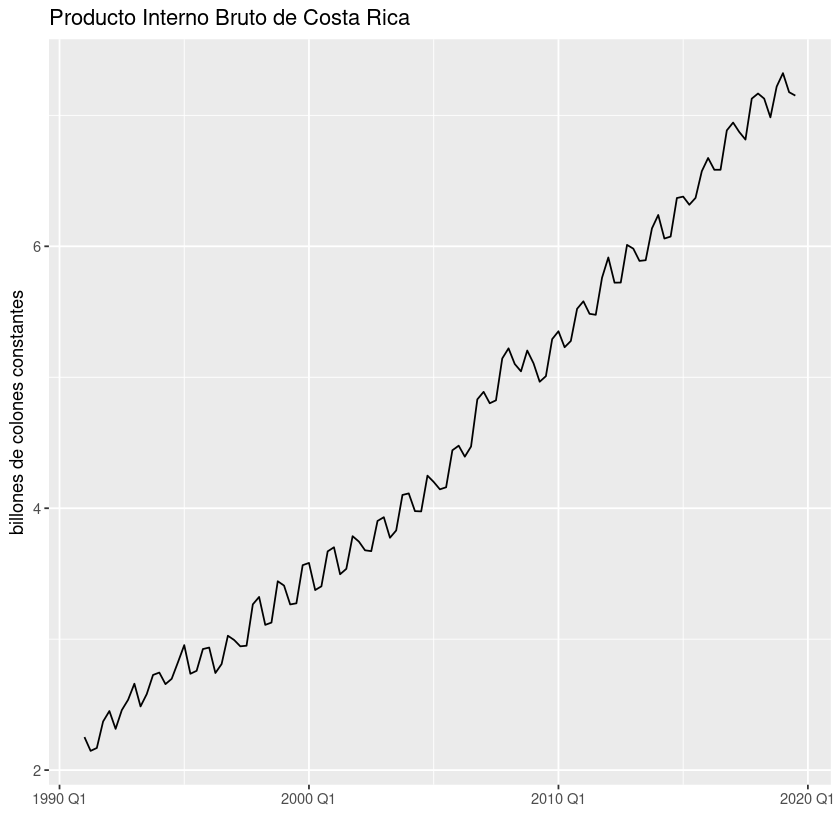

In [3]:
datos %>% autoplot(pib) +
  labs(title = "Producto Interno Bruto de Costa Rica") +
  ylab("billones de colones constantes") + xlab(" ")

Primera diferencia

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


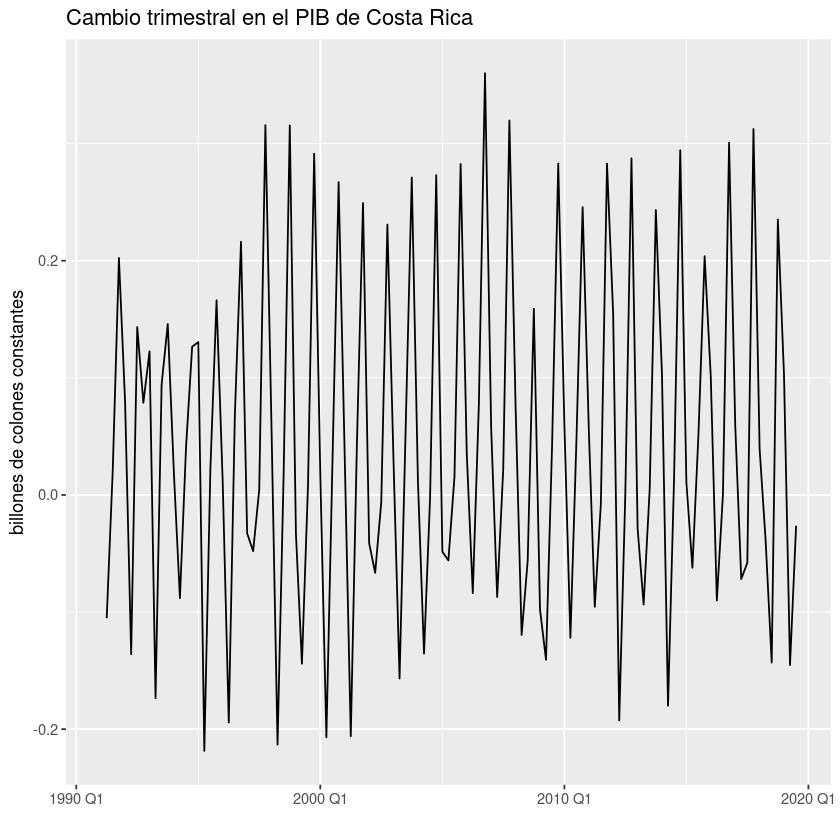

In [4]:
datos %>% mutate(Dpib=difference(pib)) %>%
  autoplot(Dpib) +
  labs(title = "Cambio trimestral en el PIB de Costa Rica") +
  ylab("billones de colones constantes") + xlab(" ")

Tasa de variación

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


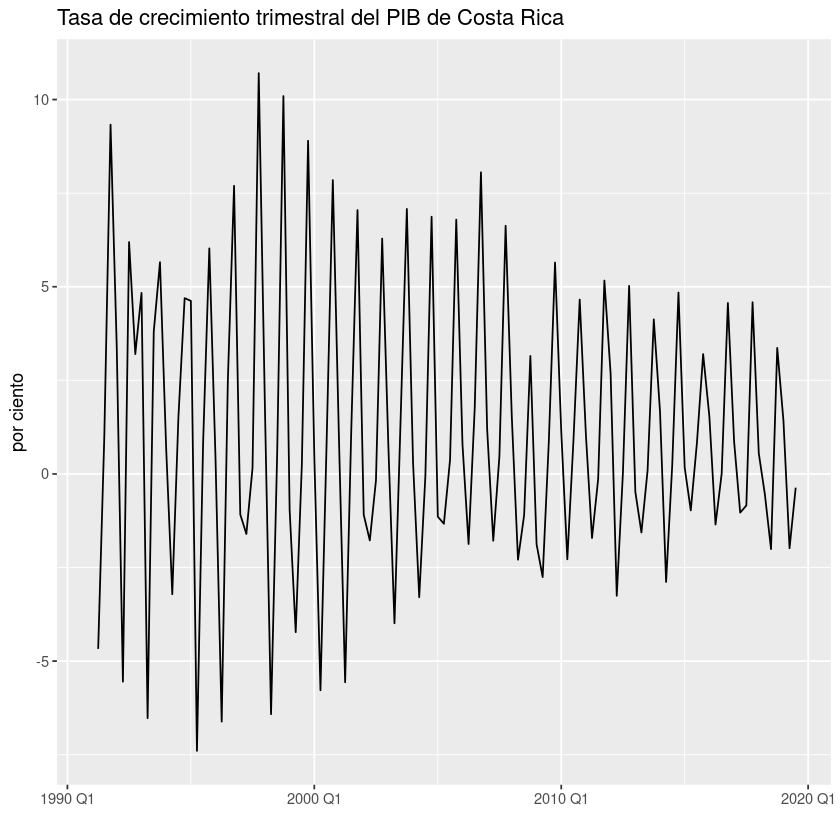

In [5]:
datos %>% mutate(growth=100* difference(pib) / lag(pib)) %>%
  autoplot(growth) +
  labs(title = "Tasa de crecimiento trimestral del PIB de Costa Rica") +
  ylab("por ciento") + xlab(" ")

Tasa de variación continua

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


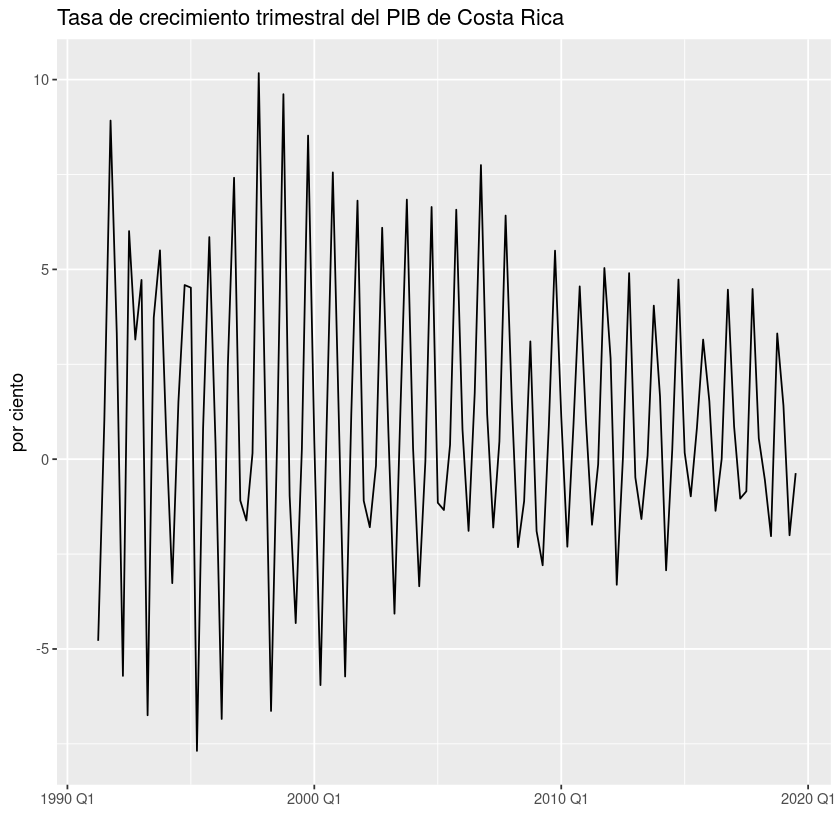

In [6]:
datos %>% mutate(growth=100* difference(log(pib))) %>%
  autoplot(growth) +
  labs(title = "Tasa de crecimiento trimestral del PIB de Costa Rica") +
  ylab("por ciento") + xlab(" ")

Cambio interanual

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


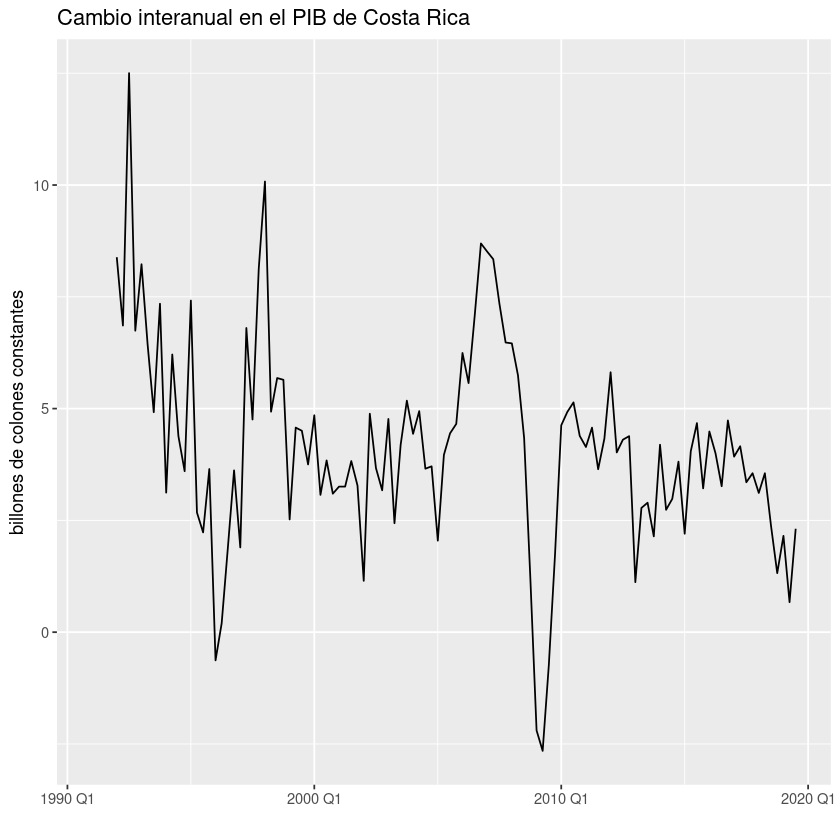

In [7]:
datos %>% mutate(growth=100* difference(pib, lag=4) / lag(pib)) %>%
  autoplot(growth) +
  labs(title = "Cambio interanual en el PIB de Costa Rica") +
  ylab("billones de colones constantes") + xlab(" ")

Tasa de variación interanual

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


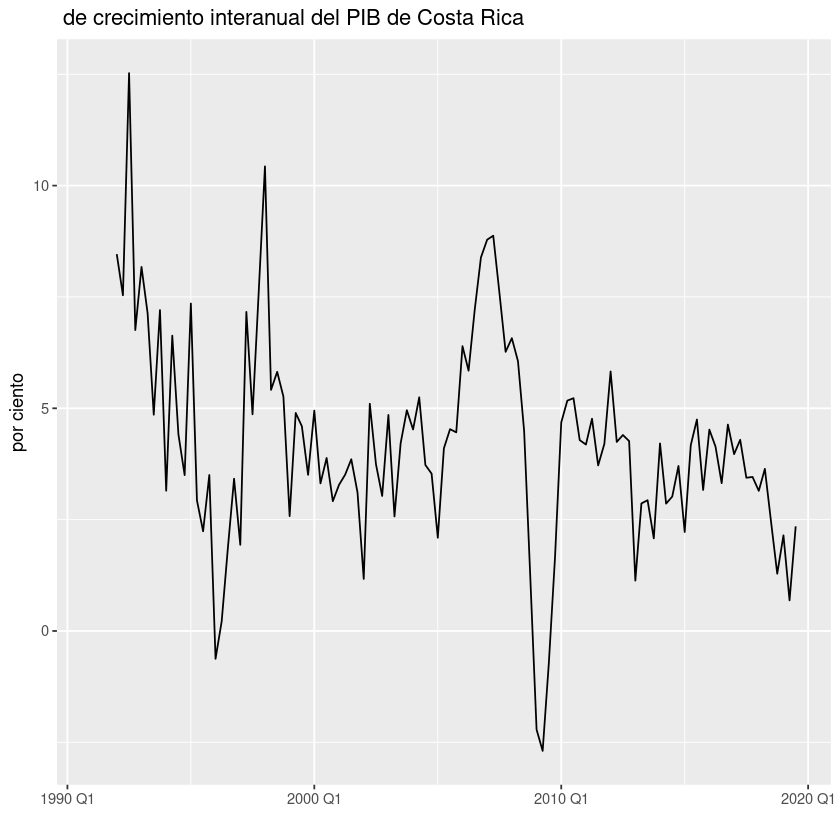

In [8]:
datos %>% mutate(growth=100* difference(log(pib), lag=4)) %>%
  autoplot(growth) +
  labs(title = " de crecimiento interanual del PIB de Costa Rica") +
  ylab("por ciento") + xlab(" ")

Serie suavizada

Plot variable not specified, automatically selected `.vars = value`



Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


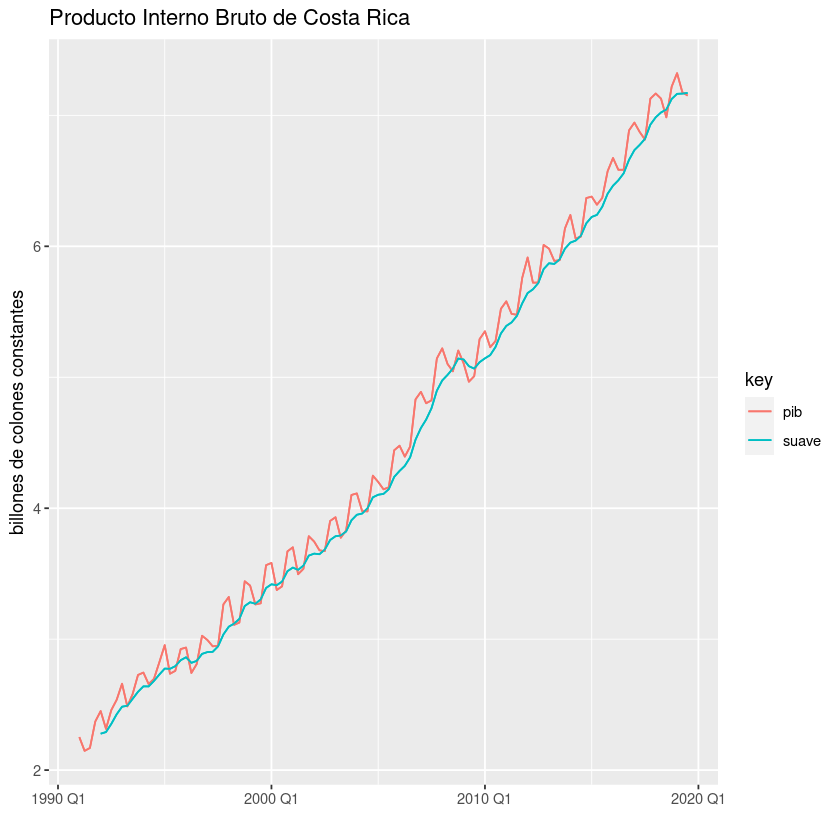

In [9]:
datos %>% mutate(suave=slide_dbl(pib, mean, .before=4, .complete=TRUE)) %>%
  select(trimestre, pib, suave) %>%
  gather() %>%
  autoplot() + geom_line() +
  labs(title = "Producto Interno Bruto de Costa Rica") +
  ylab("billones de colones constantes") + xlab(" ")

{ref}`Volver al texto principal.<subsec-nivel-serie>`